In [1]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount)<1: drive.mount('/content/drive')


In [2]:
!nvidia-smi

Tue Dec  8 16:11:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!git clone https://github.com/pjreddie/darknet.git

fatal: destination path 'darknet' already exists and is not an empty directory.


In [4]:
import os
os.chdir("/content/darknet/")
!ls

backup	      libdarknet.so  LICENSE.v1       scripts
cfg	      LICENSE	     Makefile	      src
darknet       LICENSE.fuck   obj	      tiny-yolov1.weights
data	      LICENSE.gen    predictions.jpg  tiny-yolov1.weights.1
examples      LICENSE.gpl    python	      yolov1.weights
include       LICENSE.meta   README.md
libdarknet.a  LICENSE.mit    results


In [5]:
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [6]:
!make

gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/

In [7]:


from os.path import join
from tensorflow.keras.utils import get_file
base_path="/content/drive/MyDrive/Lec_Capture/_data/yolo"
url = "http://pjreddie.com/media/files/yolov1/yolov1.weights"
fileName="yolov1.weights"
filePath = join(base_path, fileName)
get_file(filePath, url)

weight_path="/content/yolov1.weights"
![ ! -f {weight_path} ]&&cp {filePath} {weight_path}



In [8]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg {weight_path} /content/darknet/data/dog.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

In [9]:
!pip install opencv-python

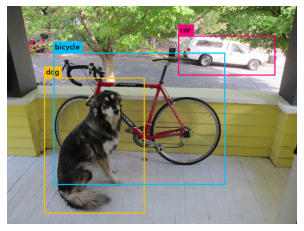

In [10]:
import cv2
import matplotlib.pyplot as plt
import os.path

def show_image(file):
  fig,ax = plt.subplots()
  ax.tick_params(labelbottom="off",bottom="off")
  ax.tick_params(labelleft="off",left="off")
  ax.set_xticklabels([]) 
  ax.axis('off')

  if os.path.exists(file):
    img = cv2.imread(file)
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(show_img)

show_image('/content/darknet/predictions.jpg')

In [11]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/yolov1.weights /content/darknet/data/kite.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

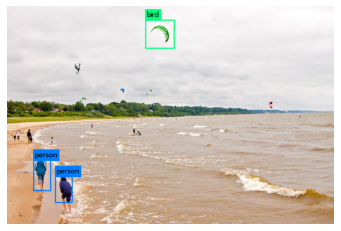

In [12]:
show_image('/content/darknet/predictions.jpg')

In [13]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/yolov1.weights /content/darknet/data/person.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

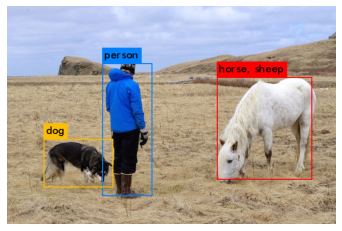

In [14]:
show_image('/content/darknet/predictions.jpg')

In [15]:
url = "http://pjreddie.com/media/files/yolov1/tiny-yolov1.weights"
fileName="tiny-yolov1.weights"
filePath = join(base_path, fileName)
get_file(filePath, url)

weight_path="/content/tiny-yolov1.weights"
![ ! -f {weight_path} ]&&cp {filePath} {weight_path}


In [16]:
!./darknet yolo test /content/darknet/cfg/yolov1-tiny.cfg {weight_path} /content/darknet/data/person.jpg


layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   448 x 448 x   3   ->   448 x 448 x  16  0.173 BFLOPs
    1 max          2 x 2 / 2   448 x 448 x  16   ->   224 x 224 x  16
    2 conv     32  3 x 3 / 1   224 x 224 x  16   ->   224 x 224 x  32  0.462 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  32   ->   112 x 112 x  32
    4 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64  0.462 BFLOPs
    5 max          2 x 2 / 2   112 x 112 x  64   ->    56 x  56 x  64
    6 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128  0.462 BFLOPs
    7 max          2 x 2 / 2    56 x  56 x 128   ->    28 x  28 x 128
    8 conv    256  3 x 3 / 1    28 x  28 x 128   ->    28 x  28 x 256  0.462 BFLOPs
    9 max          2 x 2 / 2    28 x  28 x 256   ->    14 x  14 x 256
   10 conv    512  3 x 3 / 1    14 x  14 x 256   ->    14 x  14 x 512  0.462 BFLOPs
   11 max          2 x 2 / 2    14 x  14 x 512   ->     7 x   7 x 512
   12 con

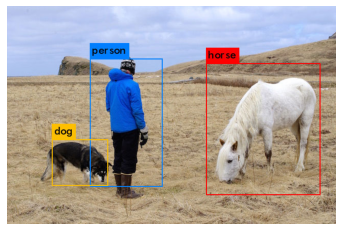

In [17]:
show_image('/content/darknet/predictions.jpg')

In [18]:
os.chdir("/content")
from google.colab import files

uploaded = files.upload()
file=[f for f in uploaded.keys()]
file=file[0]
folder=!pwd

path=join(folder[0],file)


Saving wizard.jpg to wizard.jpg


In [19]:
os.chdir("/content/darknet/")
!./darknet yolo test /content/darknet/cfg/yolov1-tiny.cfg {weight_path} {path}

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   448 x 448 x   3   ->   448 x 448 x  16  0.173 BFLOPs
    1 max          2 x 2 / 2   448 x 448 x  16   ->   224 x 224 x  16
    2 conv     32  3 x 3 / 1   224 x 224 x  16   ->   224 x 224 x  32  0.462 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  32   ->   112 x 112 x  32
    4 conv     64  3 x 3 / 1   112 x 112 x  32   ->   112 x 112 x  64  0.462 BFLOPs
    5 max          2 x 2 / 2   112 x 112 x  64   ->    56 x  56 x  64
    6 conv    128  3 x 3 / 1    56 x  56 x  64   ->    56 x  56 x 128  0.462 BFLOPs
    7 max          2 x 2 / 2    56 x  56 x 128   ->    28 x  28 x 128
    8 conv    256  3 x 3 / 1    28 x  28 x 128   ->    28 x  28 x 256  0.462 BFLOPs
    9 max          2 x 2 / 2    28 x  28 x 256   ->    14 x  14 x 256
   10 conv    512  3 x 3 / 1    14 x  14 x 256   ->    14 x  14 x 512  0.462 BFLOPs
   11 max          2 x 2 / 2    14 x  14 x 512   ->     7 x   7 x 512
   12 con

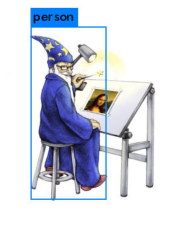

In [20]:
show_image('/content/darknet/predictions.jpg')